In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy.optimize import curve_fit

In [4]:
import matplotlib.pyplot as plt

In [5]:
tab_1 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 1')

In [6]:
tab_2 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 2')

In [7]:
tab_3 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 3')

In [8]:
tab_4 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 4')

In [9]:
# linear function
def linear(x, a, b):
	return a * x + b

In [10]:
# log10 function
def log10(x, a, b):
	return a * np.log10(x) + b

In [11]:
# log2 function
def log2(x, a, b):
	return a * np.log2(x) + b

In [12]:
# quadratic function
def polynomial_3(x, a, b, c, d):
	return a * x**3 + b * x**2 + c * x + d

In [13]:
# square function
def quadratic(x, a, b, c):
	return a * x**2 + b * x + c

In [14]:
list_functions = []

In [15]:
list_functions.append(linear)
list_functions.append(log2)
list_functions.append(log10)
list_functions.append(quadratic)
list_functions.append(polynomial_3)

In [16]:
def find_params_plot(func, x, y, tab_name):
    
    parameters, covariance = curve_fit(func, x, y)
    
    # znajdz sekwencje zmiennej x pomiedzy manjmiejszym a najwiekszym punktem
    x_line = np.arange(min(x), max(x), 1)
    
    # znajdź predykcje dla tych puktów z x
    y_line = func(x_line, *parameters)
    
    # predykcja wszystkich punktów x
    y_pred = func(x, *parameters)
    
    # sum of squared errors
    sse = sum_squared_errors(y, y_pred)
    
    # plot input vs output
    plt.scatter(x, y)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')
    title = tab_name + ' | ' + func.__name__
    plt.title(title)
    plt.show()
    
    se = np.sqrt(np.diag(covariance))
    
    print('Sum squared errors: ', sse)
    print('Parameters: ', parameters)
    
    return sse

In [17]:
def sum_squared_errors(y_true, y_pred):
     sse = np.sum((y_true-y_pred)**2)
     return sse

In [18]:
def all_functions(df, functions, tab_name):
    sse_per_tab = dict()
    
    df = df[1:]
    x = df.GRP
    y = df['1+']
    
    
    for f in functions:
        sse = find_params_plot(f, x, y, tab_name)
        sse_per_tab[f.__name__] = sse
    print(sse_per_tab)
    return sse_per_tab

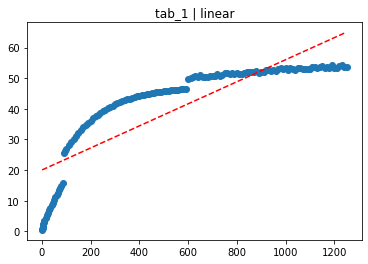

Sum squared errors:  11458.249780470322
Parameters:  [ 0.03601198 20.01498527]


Sum squared errors:  2462.2348146116296
Parameters:  [  7.30586012 -20.2568588 ]


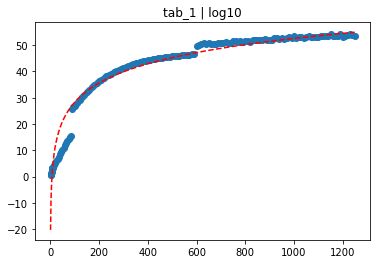

Sum squared errors:  2462.234814611631
Parameters:  [ 24.2695419  -20.25685838]


Sum squared errors:  3146.1344380533046
Parameters:  [-5.96458970e-05  1.05192578e-01  9.15196497e+00]


Sum squared errors:  1074.4765730776817
Parameters:  [ 9.51795583e-08 -2.30492764e-04  1.82515061e-01  3.75785077e+00]
{'linear': 11458.249780470322, 'log2': 2462.2348146116296, 'log10': 2462.234814611631, 'quadratic': 3146.1344380533046, 'polynomial_3': 1074.4765730776817}


In [19]:
sse_tab1 = all_functions(tab_1, list_functions, 'tab_1')

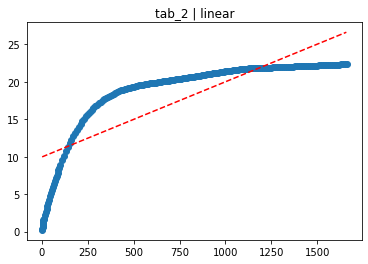

Sum squared errors:  2583.4204339177045
Parameters:  [0.01003735 9.96982075]


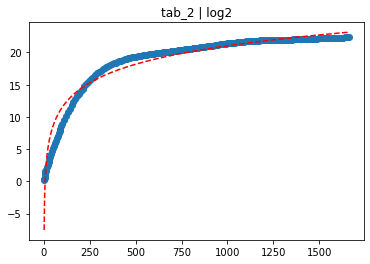

Sum squared errors:  371.29771312650354
Parameters:  [ 2.86693838 -7.52320976]


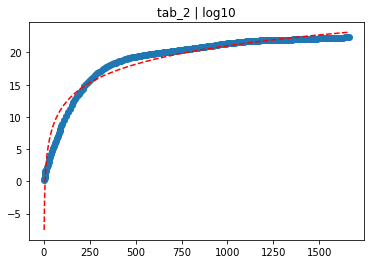

Sum squared errors:  371.2977131265036
Parameters:  [ 9.52376313 -7.52320973]


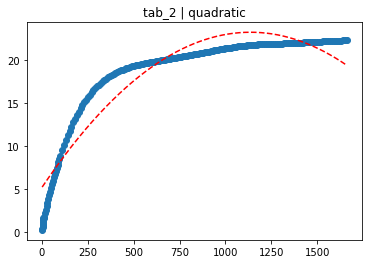

Sum squared errors:  762.4376143152804
Parameters:  [-1.40103791e-05  3.18483101e-02  5.19303384e+00]


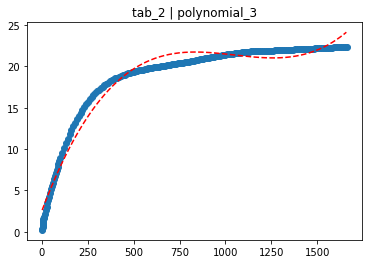

Sum squared errors:  195.8002915941324
Parameters:  [ 1.87031626e-08 -5.87312073e-05  5.89515311e-02  2.56948623e+00]
{'linear': 2583.4204339177045, 'log2': 371.29771312650354, 'log10': 371.2977131265036, 'quadratic': 762.4376143152804, 'polynomial_3': 195.8002915941324}


In [20]:
sse_tab2 = all_functions(tab_2, list_functions, 'tab_2')

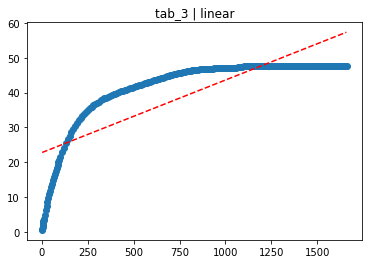

Sum squared errors:  12456.968401369475
Parameters:  [2.08270090e-02 2.27684322e+01]


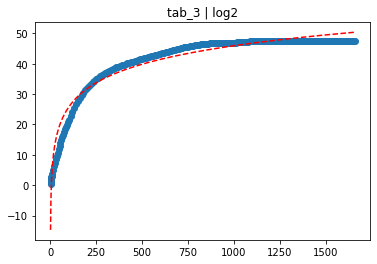

Sum squared errors:  1480.0856556120475
Parameters:  [  6.08819186 -14.74871926]


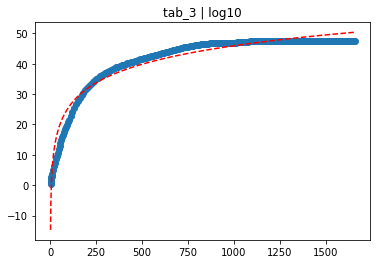

Sum squared errors:  1480.085655612048
Parameters:  [ 20.2245356  -14.74871925]


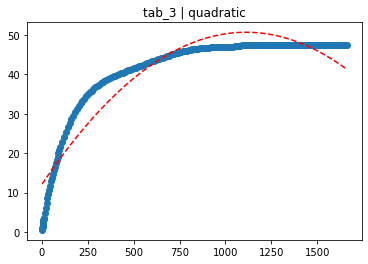

Sum squared errors:  3428.754475816564
Parameters:  [-3.11959261e-05  6.93919320e-02  1.21322967e+01]


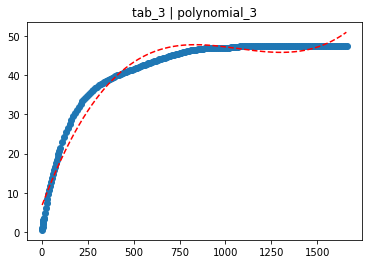

Sum squared errors:  1059.6710547578732
Parameters:  [ 3.82430602e-08 -1.22638286e-04  1.24810908e-01  6.76783011e+00]
{'linear': 12456.968401369475, 'log2': 1480.0856556120475, 'log10': 1480.085655612048, 'quadratic': 3428.754475816564, 'polynomial_3': 1059.6710547578732}


In [21]:
sse_tab3 = all_functions(tab_3, list_functions, 'tab_3')

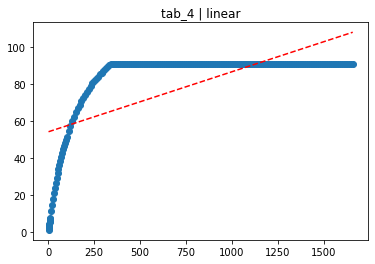

Sum squared errors:  65772.31583042735
Parameters:  [3.24498179e-02 5.44122127e+01]


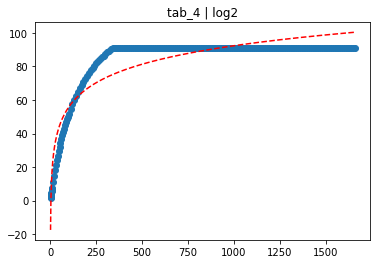

Sum squared errors:  11933.33305541314
Parameters:  [ 11.01795895 -17.44733022]


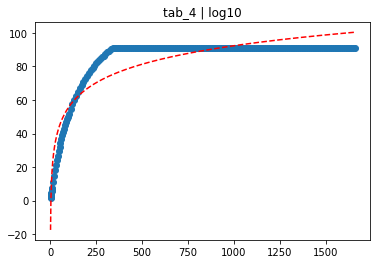

Sum squared errors:  11933.333055413143
Parameters:  [ 36.60086726 -17.44732989]


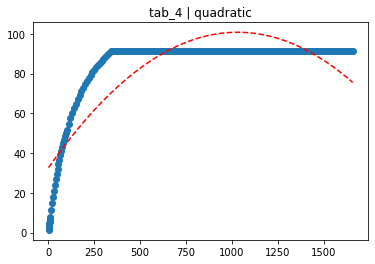

Sum squared errors:  27643.06171747522
Parameters:  [-6.41100501e-05  1.32254505e-01  3.25541284e+01]


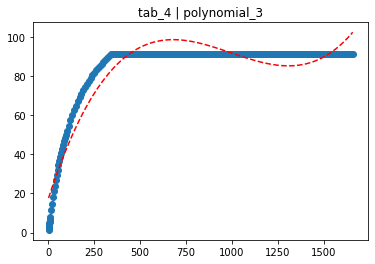

Sum squared errors:  8654.43021071952
Parameters:  [ 1.08270288e-07 -3.22993377e-04  2.89151690e-01  1.73667366e+01]
{'linear': 65772.31583042735, 'log2': 11933.33305541314, 'log10': 11933.333055413143, 'quadratic': 27643.06171747522, 'polynomial_3': 8654.43021071952}


In [22]:
sse_tab4 =  all_functions(tab_4, list_functions, 'tab_4')

In [23]:
df_tab1 = pd.DataFrame([sse_tab1, sse_tab2, sse_tab3, sse_tab4])

In [24]:
df_tab1

linear          log2         log10     quadratic  polynomial_3
0  11458.249780   2462.234815   2462.234815   3146.134438   1074.476573
1   2583.420434    371.297713    371.297713    762.437614    195.800292
2  12456.968401   1480.085656   1480.085656   3428.754476   1059.671055
3  65772.315830  11933.333055  11933.333055  27643.061717   8654.430211